# Investigate a Dataset #

## Data Collection ##


For collecting this data I went to [Gapminder](https://www.gapminder.org/data/).

The indicators selected:

 * Population->Population
 * Income
 * Population->Both sexes by age (/%):
     * 0-4
     * 5-9
     * 9-14
 * Education->Literacy
 * Infrastructure->Communication->Internet Users
 * More Data->wdi->Infrastructure->Technology->Research And Development (% of gdp)



## Define a Function ##

In [1]:
# for rotating and running average on columns
def smooth_data(df,index=None,dt=False):
    """
    ARGS: df - dataframe to be rotated and smoothed out
          index - column to set index to so they become row headers
          dt - bool whether to turn indexes to datetime format
    RETURN:
        df - rotated and smoothed data frame
    """
    if index is not None:
        df.set_index(index, inplace=True)
    df = df.transpose()
    df = df.rolling(15, 1).mean()
    if dt:
        df.index = pd.to_datetime(df.index)
    return df

def remove_nan(df_list):
    """
    ARGS: df_list - list of dataframes which need nan values dropped
    RETURNS: df_list - list adjusted with no nan values
    """
    for df in df_list:
        df.dropna(axis=1, how='all', inplace=True)
        df.dropna(axis=0, how='all', inplace=True)
    return df_list

## Data Wrangling ##
Set up data for use in observations by rotating and removing nulls

In [2]:
import pandas as pd

In [3]:
df_4 = pd.read_csv('csv/pop_0_4.csv')
df_9 = pd.read_csv('csv/pop_5_9.csv')
df_14 = pd.read_csv('csv/pop_10_14.csv')

In [4]:
df_4 = smooth_data(df_4,index='country',dt=True)
df_9 = smooth_data(df_9,index='country',dt=True)
df_14 = smooth_data(df_14,index='country',dt=True)

In [5]:
df_4, df_9, df_14 = remove_nan([df_4,df_9,df_14])

In [6]:
child_df = df_4 + df_9 + df_14
child_df.head()

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1950-01-01,41.0,38.4,40.6,40.2,39.3,30.58,33.22,26.63,22.76,33.99,...,22.45,26.87,27.87,31.0,46.2,45.5,31.86,42.3,44.7,42.0
1951-01-01,41.0,38.4,40.6,40.2,39.3,30.58,33.22,26.63,22.76,33.99,...,22.45,26.87,27.87,31.0,46.2,45.5,31.86,42.3,44.7,42.0
1952-01-01,41.0,38.4,40.6,40.2,39.3,30.58,33.22,26.63,22.76,33.99,...,22.45,26.87,27.87,31.0,46.2,45.5,31.86,42.3,44.7,42.0
1953-01-01,41.0,38.4,40.6,40.2,39.3,30.58,33.22,26.63,22.76,33.99,...,22.45,26.87,27.87,31.0,46.2,45.5,31.86,42.3,44.7,42.0
1954-01-01,41.0,38.4,40.6,40.2,39.3,30.58,33.22,26.63,22.76,33.99,...,22.45,26.87,27.87,31.0,46.2,45.5,31.86,42.3,44.7,42.0


In [7]:
pop_df = pd.read_csv('csv/pop_tot.csv')
pop_df = smooth_data(pop_df,index='country',dt=True)

In [8]:
adult_df = child_df/100 * pop_df

In [9]:
child_df = pop_df - adult_df

In [10]:
net_df = pd.read_csv('csv/internet_users.csv')

In [11]:
net_df = smooth_data(net_df,index='country',dt=True)
net_df.fillna(method='backfill', inplace=True)
net_df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1990-01-01,0.00472,0.0112,0.00036,1.53,0.00078,2.2,0.002990,0.00912,0.585000,0.13000,...,0.087400,0.785000,0.0625,0.00153,0.0568,0.01210,0.00013,0.00062,0.00678,0.00174
1991-01-01,0.00472,0.0112,0.00036,1.53,0.00078,2.2,0.002990,0.00912,0.842500,0.19450,...,0.130700,0.972500,0.0625,0.00153,0.0568,0.01210,0.00013,0.00062,0.00678,0.00174
1992-01-01,0.00472,0.0112,0.00036,1.53,0.00078,2.2,0.002990,0.00912,1.151667,0.34400,...,0.174133,1.221667,0.0625,0.00153,0.0568,0.01210,0.00013,0.00062,0.00678,0.00174
1993-01-01,0.00472,0.0112,0.00036,1.53,0.00078,2.2,0.016245,0.00912,1.356250,0.44925,...,0.260600,1.483750,0.0625,0.00153,0.0568,0.02685,0.00013,0.00062,0.00678,0.00174
1994-01-01,0.00472,0.0112,0.00036,1.53,0.00078,2.2,0.025397,0.00912,1.531000,0.63740,...,0.416480,2.159000,0.0625,0.00153,0.0568,0.03640,0.00013,0.00062,0.00678,0.00174


In [12]:
gdp_df = pd.read_csv('csv/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

In [13]:
gdp_df = smooth_data(gdp_df,index='country',dt=True)

In [14]:
gdp_df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800-01-01,603.0,667.0,715.0,1200.0,618.000000,757.0,1510.0,514.0,814.0,1850.000000,...,3430.0,2130.000000,1760.0,502.0,585.000000,682.0,861.0,877.000000,663.00,869.0
1801-01-01,603.0,667.0,715.5,1200.0,619.000000,757.0,1510.0,514.0,815.0,1850.000000,...,3435.0,2150.000000,1760.0,502.0,585.500000,682.0,861.0,878.000000,664.00,869.5
1802-01-01,603.0,667.0,716.0,1200.0,620.333333,757.0,1510.0,514.0,816.0,1853.333333,...,3440.0,2166.666667,1760.0,502.0,585.666667,682.0,861.0,879.333333,665.00,870.0
1803-01-01,603.0,667.0,716.5,1200.0,621.750000,757.0,1510.0,514.0,817.0,1857.500000,...,3415.0,2167.500000,1760.0,502.0,585.750000,682.0,861.0,880.500000,665.75,870.5
1804-01-01,603.0,667.0,717.0,1202.0,623.000000,757.0,1510.0,514.0,818.0,1862.000000,...,3390.0,2166.000000,1760.0,502.2,585.800000,682.0,861.0,881.800000,666.60,871.0


In [15]:
pop_df, adult_df, child_df, net_df, gdp_df = remove_nan([pop_df, adult_df, child_df, net_df, gdp_df])

In [16]:
pop_df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800-01-01,3280000.0,410000.000000,2500000.0,2650.0,1570000.0,37000.0,534000.0,413000.0,351000.0,3.210000e+06,...,1.230000e+07,6.800000e+06,55000.0,1920000.0,27800.0,718000.0,6550000.0,2590000.0,747000.0,1090000.0
1801-01-01,3280000.0,411000.000000,2505000.0,2650.0,1570000.0,37000.0,534000.0,413000.0,350500.0,3.210000e+06,...,1.240000e+07,6.865000e+06,55000.0,1920000.0,27800.0,718000.0,6550000.0,2590000.0,747000.0,1090000.0
1802-01-01,3280000.0,411666.666667,2510000.0,2650.0,1570000.0,37000.0,534000.0,413000.0,350000.0,3.213333e+06,...,1.246667e+07,6.933333e+06,55000.0,1920000.0,27800.0,718000.0,6550000.0,2590000.0,747000.0,1090000.0
1803-01-01,3280000.0,412250.000000,2515000.0,2650.0,1570000.0,37000.0,534000.0,413000.0,349500.0,3.217500e+06,...,1.255000e+07,7.000000e+06,55000.0,1920000.0,27800.0,718000.0,6550000.0,2590000.0,747000.0,1090000.0
1804-01-01,3280000.0,413000.000000,2520000.0,2650.0,1570000.0,37000.0,534000.0,413000.0,349200.0,3.222000e+06,...,1.264000e+07,7.068000e+06,55000.0,1920000.0,27800.0,718000.0,6550000.0,2590000.0,747000.0,1090000.0


## Visualization ##

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

### What affects the Growth of Internet users? ###

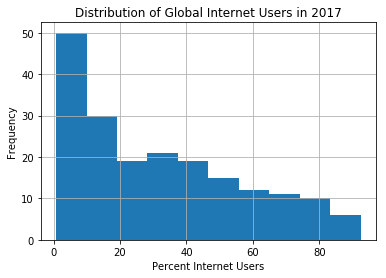

In [18]:
net_df.loc['2017-01-01',:].hist()
plt.ylabel('Frequency')
plt.xlabel('Percent Internet Users')
plt.title('Distribution of Global Internet Users in 2017');

In 2017 I can see that internet usage is still skewed to the left. Meaning most populations don't have full access to the internet.


#### How does it grow in time? ####

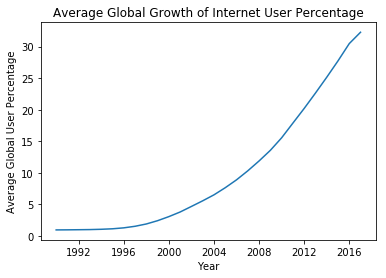

In [19]:
plt.plot(net_df.mean(axis=1))
plt.xlabel('Year')
plt.ylabel('Average Global User Percentage')
plt.title('Average Global Growth of Internet User Percentage');

Do to the heavily left skewed distribution it can be seen that even though internet usage is growing more each year that in 2017 only 30 percent of the population has access to it.

#### **Does average income affect the growth of internet usage?** ####

In [20]:
net_df.shape, gdp_df.shape
# found here https://stackoverflow.com/questions/2864842/common-elements-comparison-between-2-lists
useable_index = list(set(net_df.columns).intersection(gdp_df.columns))

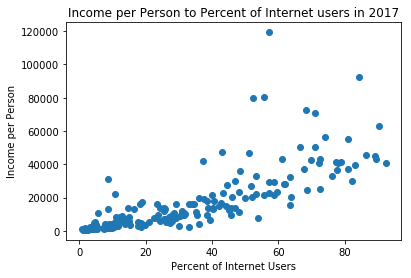

In [21]:
plt.scatter(x=net_df.loc['2017-01-01',useable_index], y=gdp_df.loc['2017-01-01', useable_index])
plt.xlabel('Percent of Internet Users')
plt.ylabel('Income per Person')
plt.title('Income per Person to Percent of Internet users in 2017');

From this scatter chart a definite trend can be seen linked to average income per person and the percentage of users in a country. There are a few outlier but overall none of the persons under a certain threhold in income have a near 80 percent internet users.

# Conclusion #
Even though the internet is more accessible than ever only 30%, in 2017, of the world had access to it. It looks as if we will soon be able to reach half of the world sooner than later. And whether having more access will increase the average income per person or the increase of income will allow more people to access the internet, there is a relation between the two. 